<a href="https://colab.research.google.com/github/jihnrhd/ForecastingSales/blob/main/Starbucks_Review_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREPROCESSING DATA

In [11]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report

## LOADING DATA

In [12]:
# dataset from  kaggle

data=pd.read_csv('/content/reviews_data.csv')
data.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [13]:
data.shape

(850, 6)

## CLEANING DATA DAN EDA

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


disini kita hapus tabel yang tidak diperlukan untuk analisis NLP

In [15]:
data.drop(['name', 'location', 'Date', 'Image_Links'], axis=1, inplace=True)

In [16]:
data.isnull().sum()

Rating    145
Review      0
dtype: int64

In [17]:
data.dropna(subset='Rating', inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 749
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  705 non-null    float64
 1   Review  705 non-null    object 
dtypes: float64(1), object(1)
memory usage: 16.5+ KB


In [21]:
data.describe()

,Rating
count,705.000000
mean,1.870922
std,1.397672
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


melihat visualisasi data dari tabel rating

<Axes: xlabel='Rating', ylabel='count'>

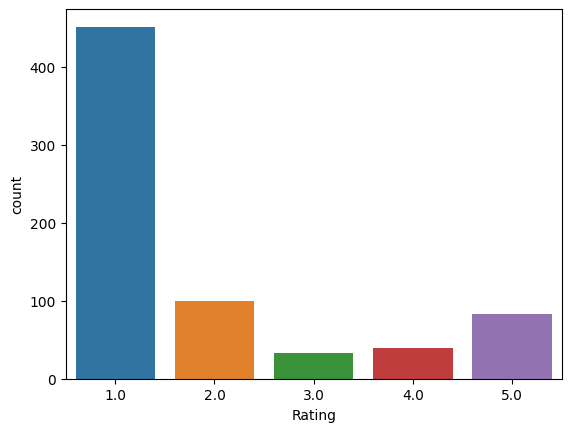

In [23]:
sns.countplot(x=data['Rating'])

<Axes: xlabel='Rating', ylabel='Density'>

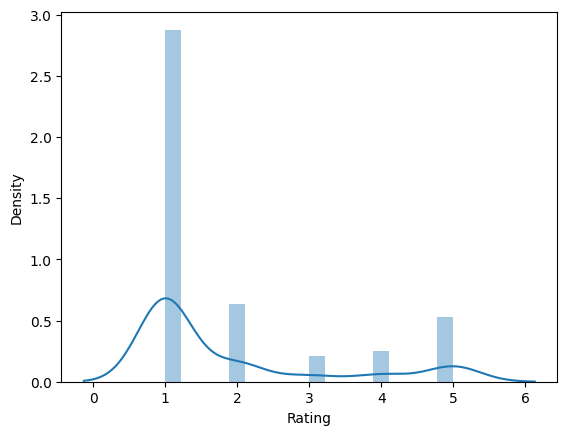

In [24]:
sns.distplot(data['Rating'], kde=True)

## PREPROCESSING TEKS

In [26]:
pip install nltk

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
#Remove Stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

#Clean Text
def clean_text(text):
    text = text.lower()
    text = re.sub("[^a-zA-Z]"," ",text)
    text = ' '.join(text.split())
    return text

#stemming
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [29]:
data['Review'] = data['Review'].astype(str)
data['Review'] = data['Review'].apply(lambda x: remove_stopwords(x))
data['Review'] = data['Review'].apply(lambda x: clean_text(x))
data['Review'] = data['Review'].apply(stemming)

## word cloud

In [30]:
all_words = ' '.join(word for word in data['Review'])

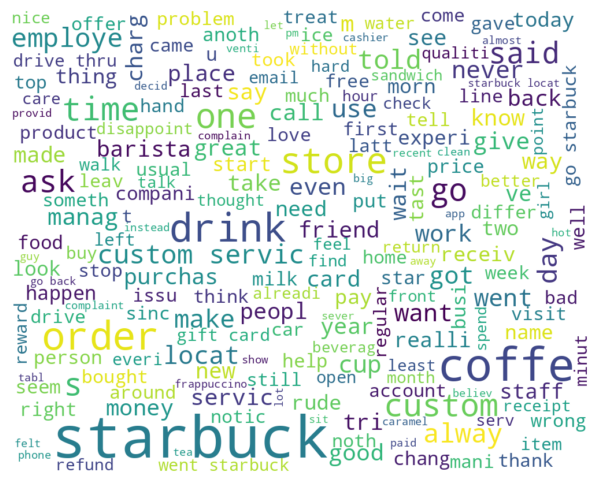

In [31]:
wordcloud = WordCloud(
    width=1000,
    height=800,
    background_color = 'white',
    random_state = 21,
    max_font_size = 100).generate(all_words)

plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# MODEL BULIDING

menggunakan TF-IDF

In [32]:
tfidf = TfidfVectorizer()
X = data['Review']
y = data['Rating']
X = tfidf.fit_transform(X).toarray()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [34]:
names_of_models=[
    'LogisticRegression',
    'RidgeClassifier',
    'AdaBoostClassifier',
    'RandomForestClassifier',
    'GaussianNB',
    'BernoulliNB',
    'MultinomialNB',
    'SVC',
    'LinearSVC',
    'KNeighborsClassifier'
]
models={
    'LogisticRegression': LogisticRegression(),
    'RidgeClassifier': RidgeClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'MultinomialNB': MultinomialNB(),
    'SVC': SVC(),
    'LinearSVC': LinearSVC(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

In [35]:
accuracies=[]

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)

    AS=accuracy_score(y_test, y_pred)
    accuracies.append(AS)

    print(f'Hasil untuk model {name}')
    print('Accuracy score:', AS)
    print()

Hasil untuk model LogisticRegression
Accuracy score: 0.624113475177305

Hasil untuk model RidgeClassifier
Accuracy score: 0.6524822695035462

Hasil untuk model AdaBoostClassifier
Accuracy score: 0.6028368794326241

Hasil untuk model RandomForestClassifier
Accuracy score: 0.6312056737588653

Hasil untuk model GaussianNB
Accuracy score: 0.5957446808510638

Hasil untuk model BernoulliNB
Accuracy score: 0.5957446808510638

Hasil untuk model MultinomialNB
Accuracy score: 0.5957446808510638

Hasil untuk model SVC
Accuracy score: 0.5957446808510638

Hasil untuk model LinearSVC
Accuracy score: 0.6524822695035462

Hasil untuk model KNeighborsClassifier
Accuracy score: 0.6524822695035462



In [37]:
data1 = pd.DataFrame({'Nama Model': names_of_models, 'Akurasi': accuracies}).sort_values(by=['Akurasi'],
                                                                                      ascending=False)
data1.style.background_gradient(axis=0, cmap='Greens')

,Nama Model,Akurasi
1,RidgeClassifier,0.652482
8,LinearSVC,0.652482
9,KNeighborsClassifier,0.652482
3,RandomForestClassifier,0.631206
0,LogisticRegression,0.624113
2,AdaBoostClassifier,0.602837
4,GaussianNB,0.595745
5,BernoulliNB,0.595745
6,MultinomialNB,0.595745
7,SVC,0.595745
